### Phonon Unfolding and Projection (`puppy`)

1. example situation is a silver vacancy (*V*<sub>Ag</sub>) in AgI

In [1]:
%load_ext autoreload
%autoreload 2

You can use `DOPED` to find the vacancy site if probing vacancy phonons

In [2]:
from doped.analysis import defect_from_structures
from pymatgen.core import Structure 
vacancy_index = defect_from_structures(
            bulk_supercell = Structure.from_file('./agi/v_Ag/host/SPOSCAR.gz'),
            defect_supercell=Structure.from_file('./agi/v_Ag/defect/SPOSCAR.gz')
            )
vacancy_index.defect_site_index,vacancy_index.defect_site.coords

(31, array([6.83911393, 1.31618809, 7.45983835]))

In [ ]:
import warnings 
import pprint
from puppy.unfolder import PhononUnfoldingandProjection as Puppy
import numpy as np 
warnings.simplefilter('ignore')


directories = {'defect_directory':'./agi/v_Ag/defect/',
               'host_directory':'./agi/v_Ag/host/'}


puppy = Puppy(
    defect_directory=directories['defect_directory'],
              host_directory=directories['host_directory'],
              line_density=20,
              defect_site_index=vacancy_index.defect_site_index,
              defect_site_coords=vacancy_index.defect_site.coords,
              nearest_neighbour_tolerance=4,
              matrix = np.array([[3,0,0],[0,3,0],[0,0,2]]),
              )
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(puppy.get_neighbour_sites()) # shows what you are interested in around the defect

puppy.get_host_phonons(eigenvectors=True)
puppy.get_defect_phonons()

puppy.matrix

{'Ag': [], 'I': [66, 38, 39, 42]}
None


array([[0., 3., 0.],
       [3., 3., 0.],
       [0., 0., 2.]])

In [25]:
puppy.unfold() 
puppy.eigenvectors_to_eigendisplacements()

generating_eigendisplacements...: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


In [26]:
unfold_data = puppy.unfold_data

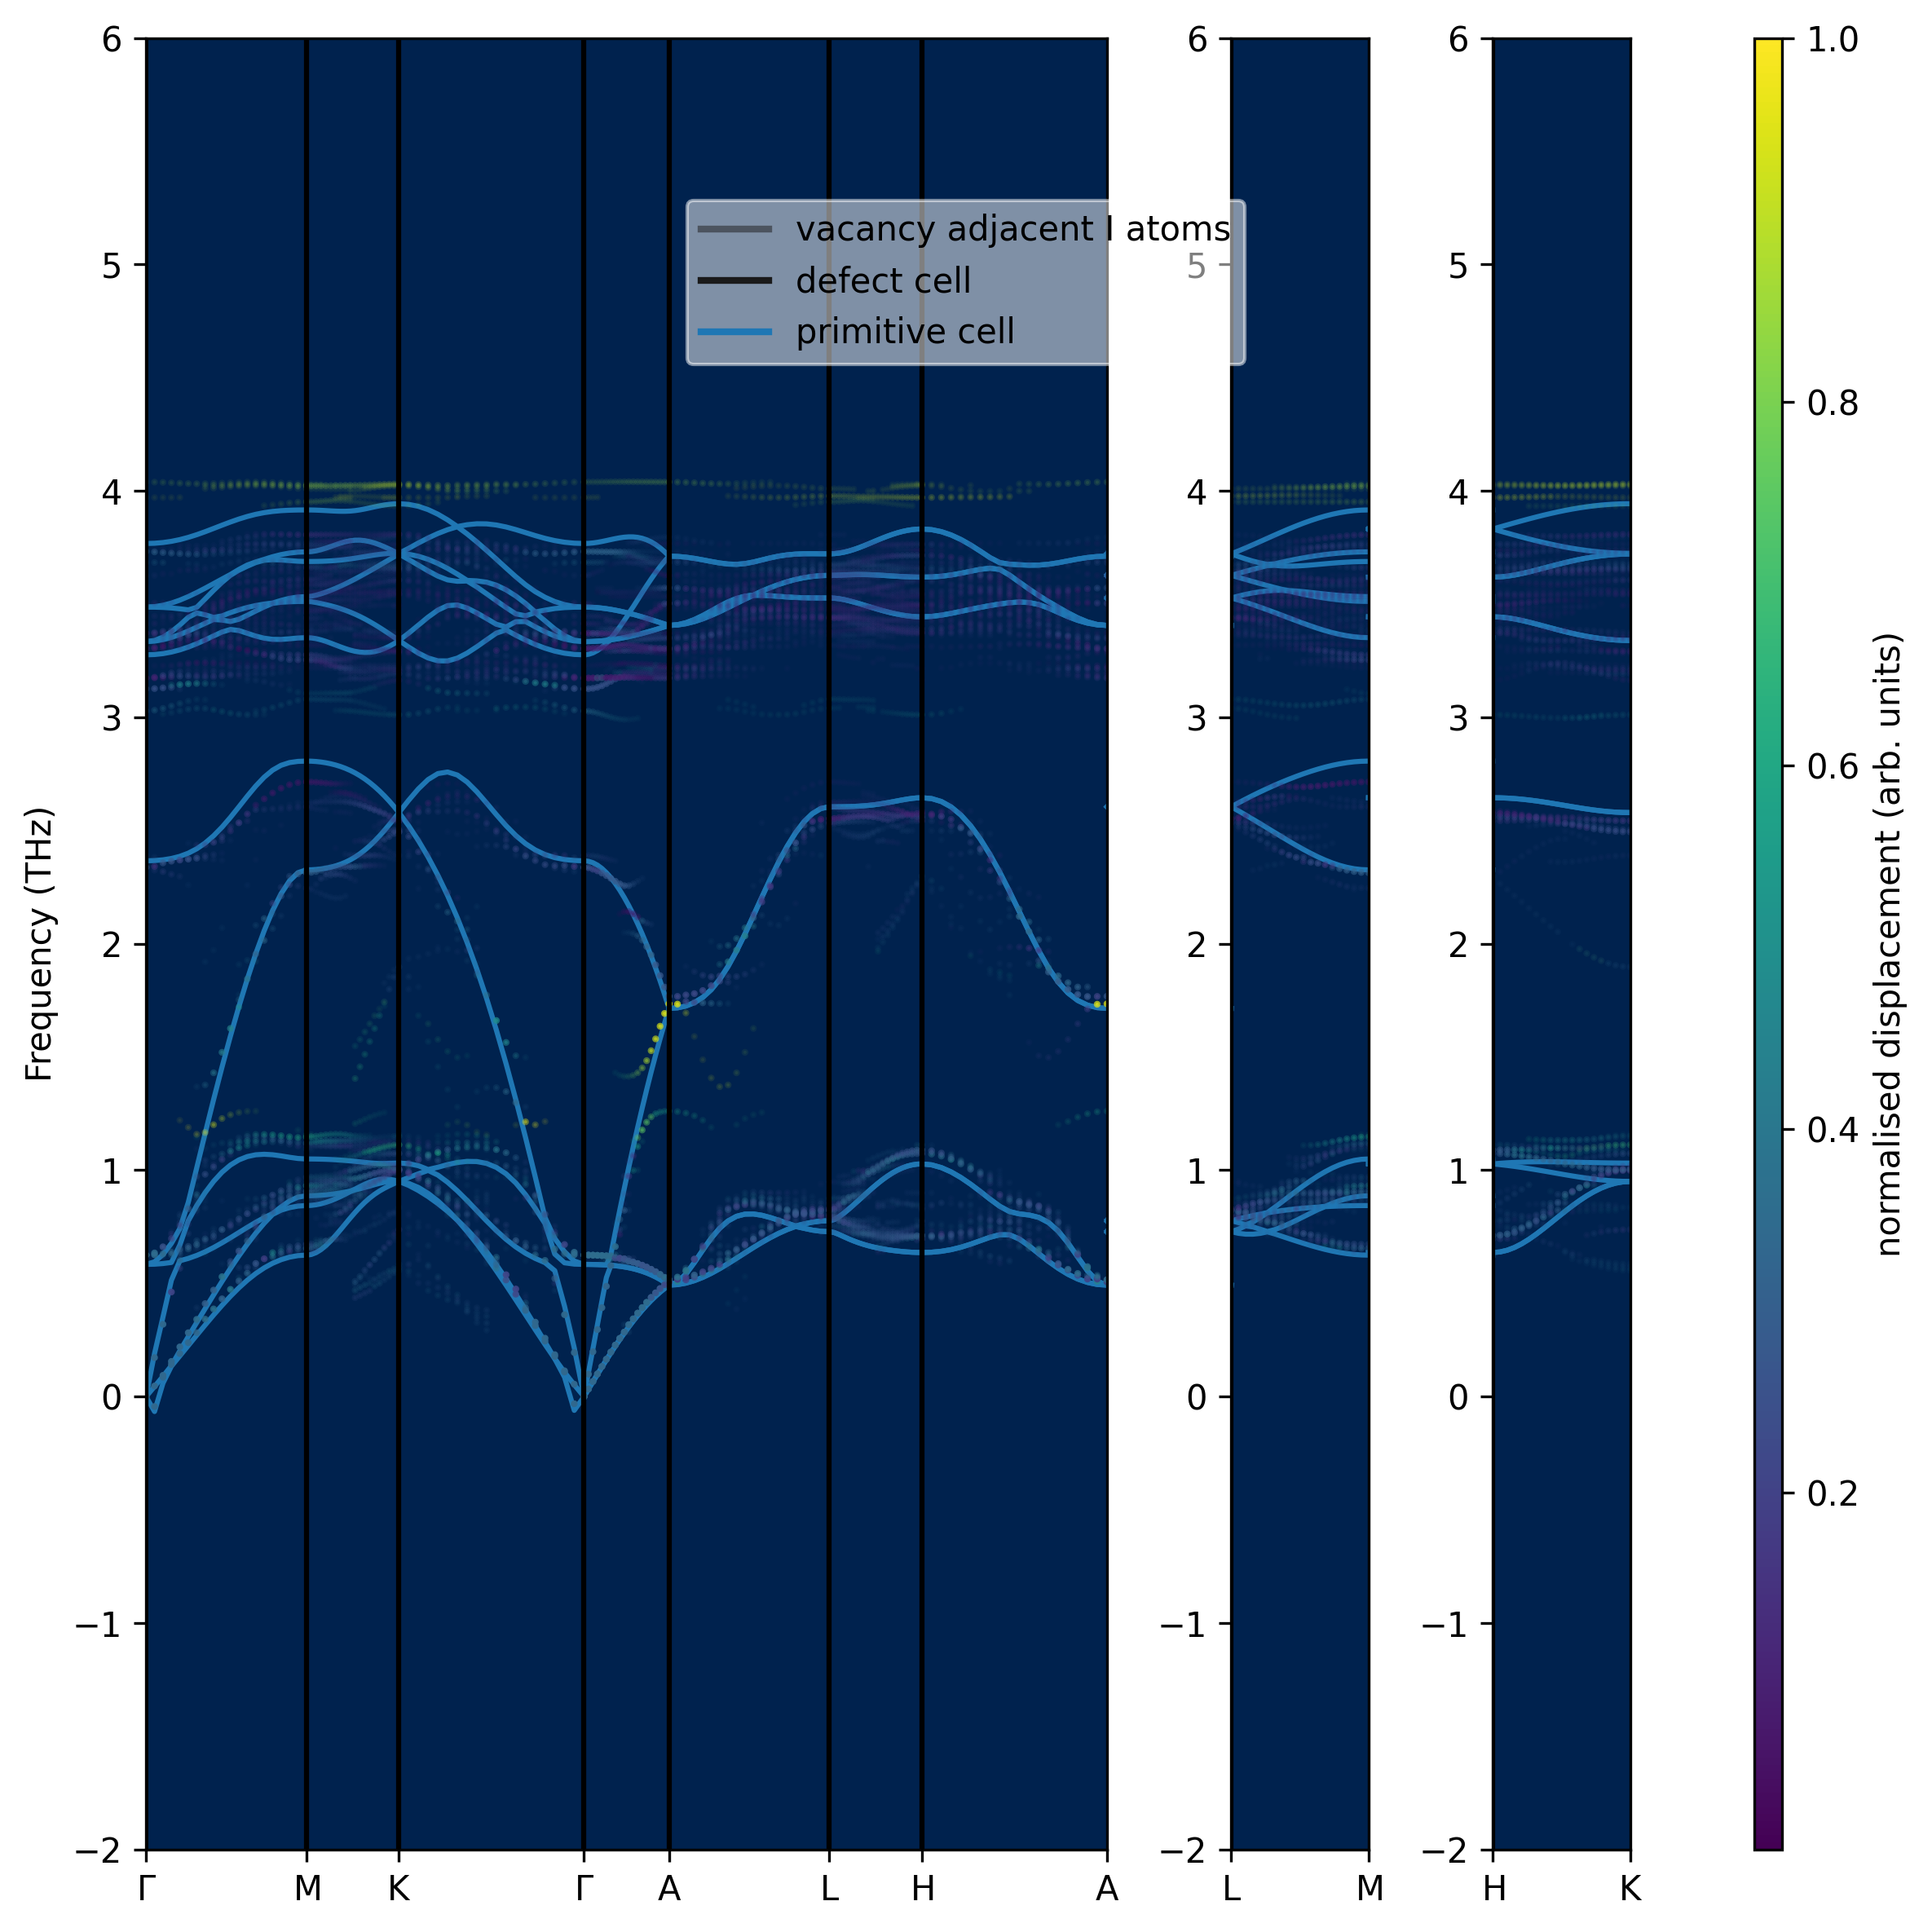

In [32]:
from puppy.plotting import PuppyPlotter 
import matplotlib as mpl 
cmap = 'cividis'
mpl.rcParams['pdf.fonttype'] = 42
comap = mpl.colormaps.get_cmap(cmap)
mpl.rcParams["axes.facecolor"] = comap.colors[0]

plot_kws={'s':1,'rasterized':True,'edgecolor':None,'linewidths':None}

legend_kws={'facecolor':'white',
                        'framealpha':0.5,
                        'edgecolor':'white',
                        'bbox_to_anchor':[0.5,0.9],
                        'loc':'upper center'}

pp =  PuppyPlotter(unfold_data=unfold_data)
fig,axes = pp.plot_unfold(
    with_prim=True,
    threshold=0.05,
    atom='I',
    plot_kws=plot_kws,
    legend_kws=legend_kws
)

In [ ]:
fig.savefig('../static/unfolded.png')